## Import libraries

In [2]:
import numpy as np
import gdal
import random
from random import sample
import rasterio
import geopandas as gpd
from osgeo import gdal, gdal_array 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.mask import mask
import earthpy.plot as ep
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap, BoundaryNorm

## Read the mean values of the segments

In [3]:
b2_1 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_1__mn_n.tif'
b2_2 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_2__mn_n.tif'
b2_3 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_3__mn_n.tif'
b2_4 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_4__mn_n.tif'
b2_5 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_5__mn_n.tif'
b2_6 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_6__mn_n.tif'
b2_7 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_7__mn_n.tif'
b2_8 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b2/mean/date_8__mn_n.tif'
b3_1 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_1_mn_n.tif'
b3_2 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_2_mn_n.tif'
b3_3 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_3_mn_n.tif'
b3_4 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_4_mn_n.tif'
b3_5 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_5_mn_n.tif'
b3_6 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_6_mn_n.tif'
b3_7 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_7_mn_n.tif'
b3_8 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b3/mean/date_8_mn_n.tif'
b4_1 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_1_mn_n.tif'
b4_2 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_2_mn_n.tif'
b4_3 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_3_mn_n.tif'
b4_4 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_4_mn_n.tif'
b4_5 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_5_mn_n.tif'
b4_6 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_6_mn_n.tif'
b4_7 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_7_mn_n.tif'
b4_8 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b4/mean/date_8_mn_n.tif'
b8_1 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_1_mn_n.tif'
b8_2 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_2_mn_n.tif'
b8_3 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_3_mn_n.tif'
b8_4 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_4_mn_n.tif'
b8_5 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_5_mn_n.tif'
b8_6 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_6_mn_n.tif'
b8_7 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_7_mn_n.tif'
b8_8 = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Composite/b8/mean/date_8_mn_n.tif'


In [4]:
#Read as array
raster = [b2_1,b2_2,b2_3,b2_4,b2_5,b2_6,b2_7,b2_8,b3_1,b3_2,b3_3,b3_4,b3_5,b3_6,b3_7,b3_8,b4_1,b4_2,b4_3,b4_3,b4_5,b4_6,b4_7,b4_8,
         b8_1,b8_2,b8_3,b8_4,b8_5,b8_6,b8_7,b8_8]
path_to_roi = 'D://CDE//Internship_INRAE//Data_Dordogne//training_data_pixel_based//train_data_40.tif'

with rasterio.open(path_to_roi) as ds:
    roi_array = ds.read(1)
    nodata = ds.profile['nodata']

idx = np.where(roi_array!=nodata)

train_X = []
for band in raster:
    with rasterio.open(band) as ds:
        band_array = ds.read()
        #print (band_array.shape)
        band_array = np.moveaxis(band_array,0,-1)
        #print (band_array.shape)
        band_array_roi = band_array[idx]
        #print (band_array_roi.shape)
        train_X.append( band_array_roi )
train_X = np.column_stack(train_X)
print (train_X.shape)

(364151, 32)


In [5]:
# normalized raster datasets

red = 'C:/Normalized/Red_bands_Normalized.tif'
green = 'C:/Normalized/Green_bands_Normalized.tif'
blue = 'C:/Normalized/Blue_bands_Normalized.tif'
nir = 'C:/Normalized/NIR_bands_Normalized.tif'
ndvi ='C:/Normalized/NDVI_Normalized.tif'
evi = 'C:/Normalized/EVI_Normalized.tif'
savi ='C:/Normalized/SAVI_Normalized.tif'

## Prepare train data with both pixel and object information

In [6]:
# Adding the pixel information
raster1 = [b2_1,b2_2,b2_3,b2_4,b2_5,b2_6,b2_7,b2_8,b3_1,b3_2,b3_3,b3_4,b3_5,b3_6,b3_7,b3_8,b4_1,b4_2,b4_3,b4_3,b4_5,b4_6,b4_7,b4_8,
         b8_1,b8_2,b8_3,b8_4,b8_5,b8_6,b8_7,b8_8,red,green,blue,nir,ndvi,evi,savi]
path_to_roi = 'D://CDE//Internship_INRAE//Data_Dordogne//training_data_pixel_based//train_data_40.tif'

with rasterio.open(path_to_roi) as ds:
    roi_array = ds.read(1)
    nodata = ds.profile['nodata']

idx = np.where(roi_array!=nodata)

X = []
for band in raster1:
    with rasterio.open(band) as ds:
        band_array = ds.read()
        #print (band_array.shape)
        band_array = np.moveaxis(band_array,0,-1)
        #print (band_array.shape)
        band_array_roi = band_array[idx]
        #print (band_array_roi.shape)
        X.append( band_array_roi )
X = np.column_stack(X)
print (X.shape)

(364151, 88)


In [7]:
#window = rasterio.windows.Window(0,0,5572,100)
       # band_array = ds.read(window=window

In [8]:
y = roi_array[roi_array > 0]
y.shape

(364151,)

In [9]:
#X = X_train 
y

array([7., 3., 3., ..., 5., 5., 5.], dtype=float32)

## Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.85, random_state=42,stratify = y)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54622, 88)
(309529, 88)
(54622,)
(309529,)


## Random Forest Classification

In [12]:
classifier= RandomForestClassifier(n_estimators = 400,min_samples_split = 4)
classifier.fit(X_train,y_train)
result_valid = classifier.predict(X_test)
print('done')

done


## Confusion matrix

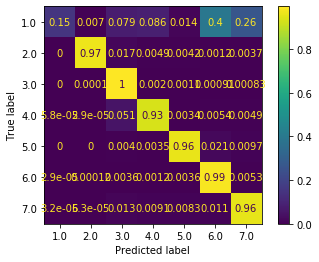

<Figure size 2880x1296 with 0 Axes>

In [21]:
np.set_printoptions(precision=2)
plot_confusion_matrix(classifier,X_test,y_test,labels = np.unique(y_test),normalize= 'true')
np.set_printoptions(precision=2)
plt.figure(figsize = (40,18))
np.set_printoptions(precision=2)
#plot_confusion_matrix(cm, labels=np.unique(y_test), normalize=True)
plt.savefig('confusionmatrix.png', bbox_inches="tight")
plt.show()

## Accuracy

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

print('Overal Accuracy TA : ', accuracy_score(result_valid, y_test))
print('Cohen_kappa TA: ', cohen_kappa_score(result_valid, y_test))
print ('F1 score:', f1_score(y_test, result_valid,average=None))
print ('F1 score:', f1_score(y_test, result_valid,average='weighted'))

Overal Accuracy TA :  0.9769520788036016
Cohen_kappa TA:  0.9662548266966606
F1 score: [0.26 0.98 0.99 0.95 0.96 0.97 0.96]
F1 score: 0.9761709966987074


## Feature Importance

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.02 0.01 0.01
 0.01 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.06 0.02 0.01 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.   0.   0.   0.   0.   0.02
 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.01 0.   0.   0.   0.
 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.04 0.   0.01
 0.   0.   0.01 0.01 0.01 0.04 0.01 0.   0.   0.   0.01 0.01 0.02 0.04
 0.   0.01 0.   0.  ]


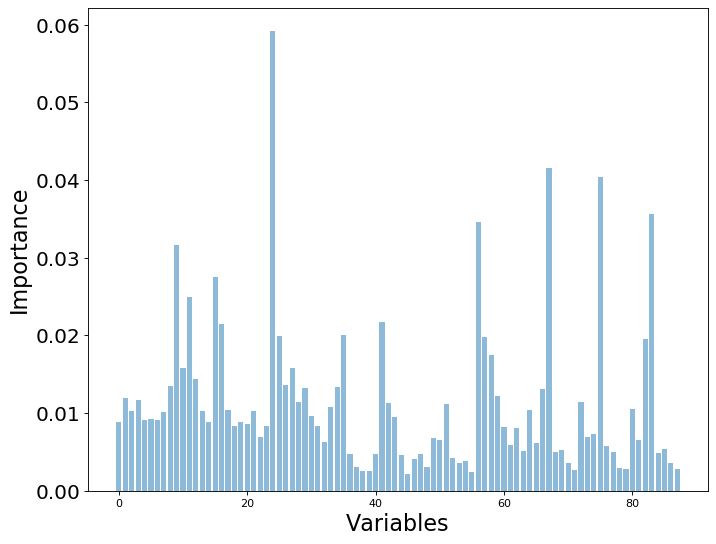

In [17]:
importance = classifier.feature_importances_
print(importance)
y_pos = np.arange(len(importance))
plt.figure(figsize = (10,8), dpi=80)
plt.bar(y_pos,importance,align ='center',alpha=0.5)
#plt.xticks(y_pos,list_label_raster, fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.ylabel("Importance", fontsize=20)
plt.xlabel('Variables',fontsize=20)
plt.savefig('RF_importance.png', bbox_inches="tight")

## Predict for the whole image

In [18]:
# whole image
#band_lst = [blue,green,red,nir,ndvi,savi,evi]
band_lst = raster1
img = []
for band in band_lst:
    with rasterio.open(band) as ds:
        band_array = ds.read()
        #print(band_array.shape)
        band_array = np.moveaxis(band_array,0,-1)
        img.append( band_array )
        
         
#img = np.stack(img,axis=2)
img_shp = np.concatenate(img,axis= 2)
print (img_shp.shape)
img = img_shp.reshape(-1, img_shp.shape[2] )
#img = np.column_stack(img)
print (img.shape)

(5390, 5572, 88)
(30033080, 88)


In [19]:
# whole image
#band_lst = [blue,green,red,nir,ndvi,savi,evi]
band_lst = raster1
img = []
for band in band_lst:
    with rasterio.open(band) as ds:
        #band_array = ds.read()
        window = rasterio.windows.Window(0,0,5572,100)
        band_array = ds.read(window=window)
        band_array = band_array.reshape(-1, band_array.shape[1]*band_array.shape[2] )
        #print(band_array.shape)
        band_array = np.moveaxis(band_array,0,-1)
        img.append( band_array )
        
        
                 
#img = np.stack(img,axis=2)
print(band_array.shape)
img_shp = np.concatenate(img,axis= 1)
print (img_shp.shape)
#img = img_shp.reshape(-1, img_shp.shape[2] )
#img = np.column_stack(img)
#print (img.shape)

(557200, 8)
(557200, 88)


In [20]:
#window = rasterio.windows.Window(0,0,5572,100)
        #band_array = ds.read(window=window)
band_array.shape    

(557200, 8)

In [64]:
class_prediction_rf = classifier.predict(img)

In [65]:
class_prediction_rf.shape

(30033080,)

In [67]:
# Reshape the classification map to be visualized
class_prediction = class_prediction_rf.reshape(img_shp.shape[0] ,img_shp.shape[1] )
#class_prediction = class_prediction_rf.reshape(100,5572 )
class_prediction.shape

(5390, 5572)

## Visualizing the results

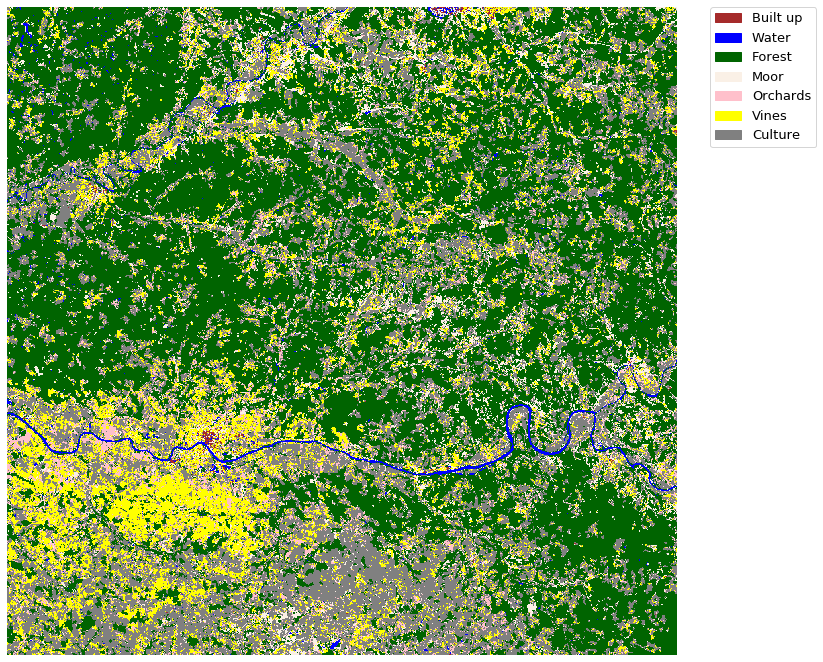

In [82]:
# Create a list of labels to use for your legend
height_class_labels = ["Built up", "Water",
                       "Forest", "Moor",
                      "Orchards","Vines","Culture"]

# Create a colormap from a list of colors
colors = ['brown','blue','darkgreen', 'lightgreen', 'linen','pink', 'yellow','grey']
cmap = ListedColormap(colors)

f, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(class_prediction,
               cmap=cmap)

ep.draw_legend(im, titles=height_class_labels)
ax.set_axis_off()

plt.show()

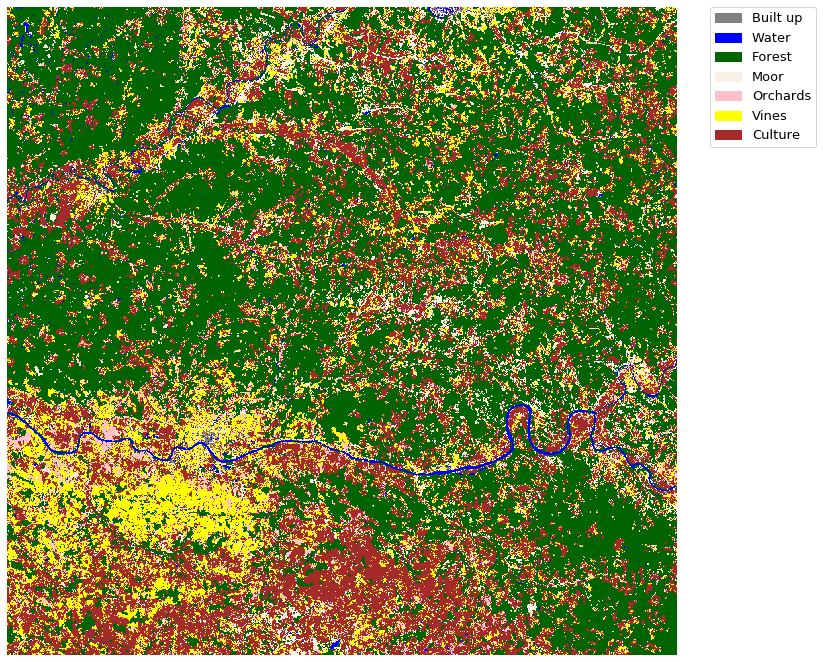

In [71]:
# Create a list of labels to use for your legend
height_class_labels = ["Built up", "Water",
                       "Forest", "Moor",
                      "Orchards","Vines","Culture"]

# Create a colormap from a list of colors
colors = ['grey','blue','darkgreen', 'lightgreen', 'linen','pink', 'yellow','brown']
cmap = ListedColormap(colors)

f, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(class_prediction,
               cmap=cmap)

ep.draw_legend(im, titles=height_class_labels)
ax.set_axis_off()

plt.show()

## Writing out the output using rasterio

In [70]:
red_r = 'D:/CDE/Internship_INRAE/Sentinel_2_Data/Gap_Filled/ImageTimeSeriesGapFilling_B4_DORDOGNE_2016_CONCAT_S2.tif'
    
with rasterio.open(red_r) as src:

    # Write an array as a raster band to a new  file. For
    # the new file's profile, we start with the profile of the source
    profile = src.profile

    # And then change the band count to 1, set the
    # dtype to float32, and specify LZW compression.
    profile.update(
        dtype=rasterio.float32,
        count=1,
        compress='lzw')

    with rasterio.open('D:/CDE/Internship_INRAE/RandomForestClassification/Pixel_Based&object_based_Classification_RF_Dordogne_1.tif', 'w', **profile) as dst:
        dst.write(class_prediction.astype(rasterio.float32), 1)

